Available Modes: ['Subways', 'Buses', 'LIRR', 'MetroNorth', 'AccessARide', 'StatenIsland', 'Bridges_Tunnels']

========== FORECAST FOR Subways ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


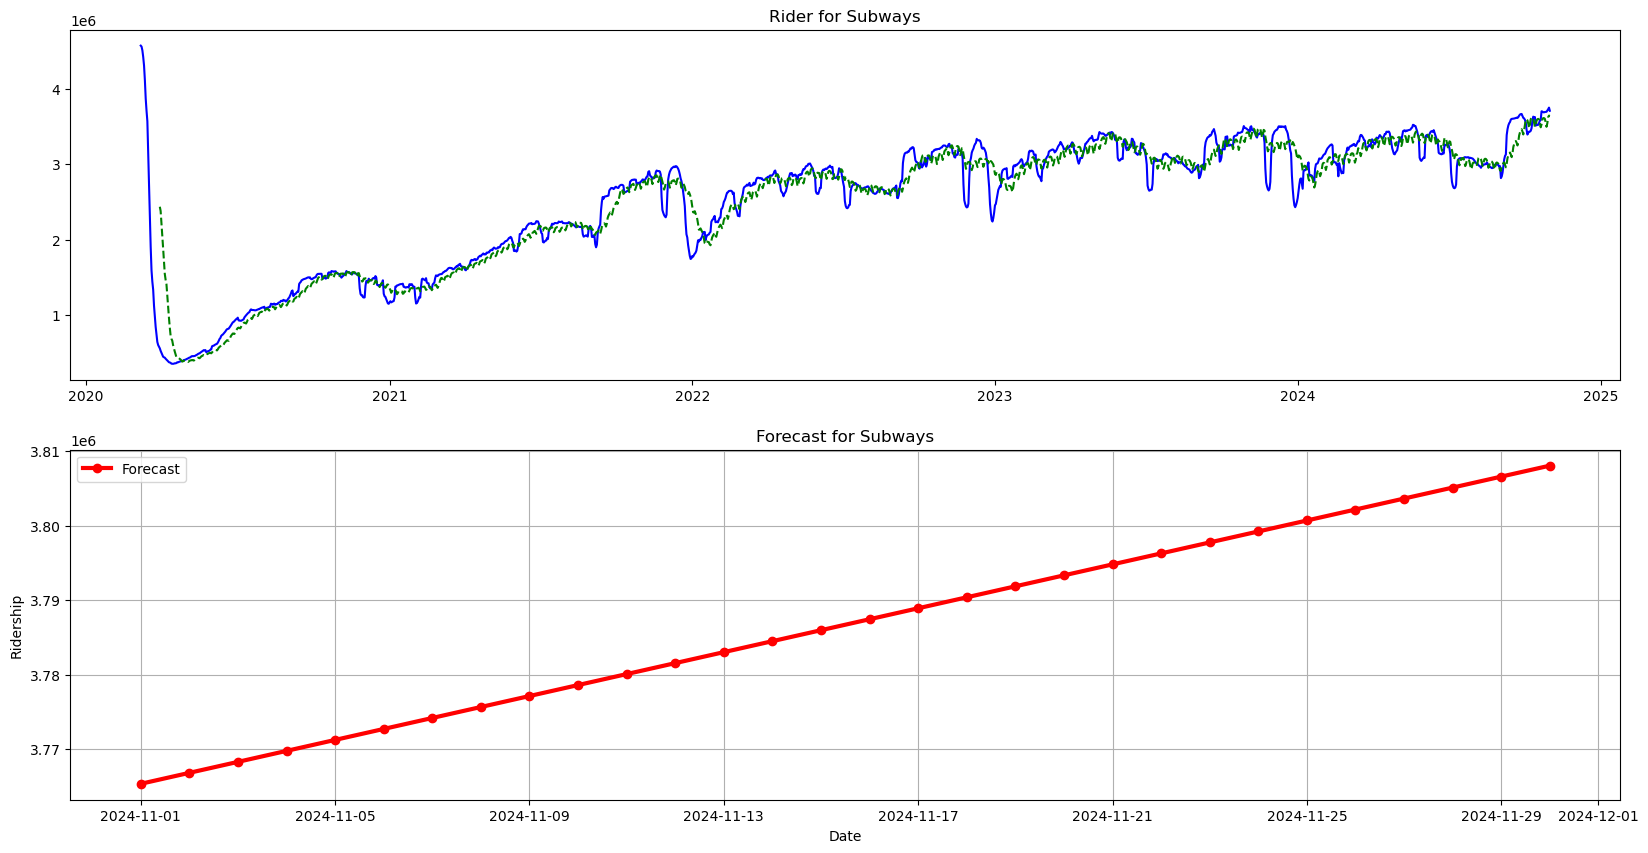

Mode Subways 

Next_30_Days_Total 113601495 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 3808060} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 3765373} 

Trend UPWARD 📈 


========== FORECAST FOR Buses ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


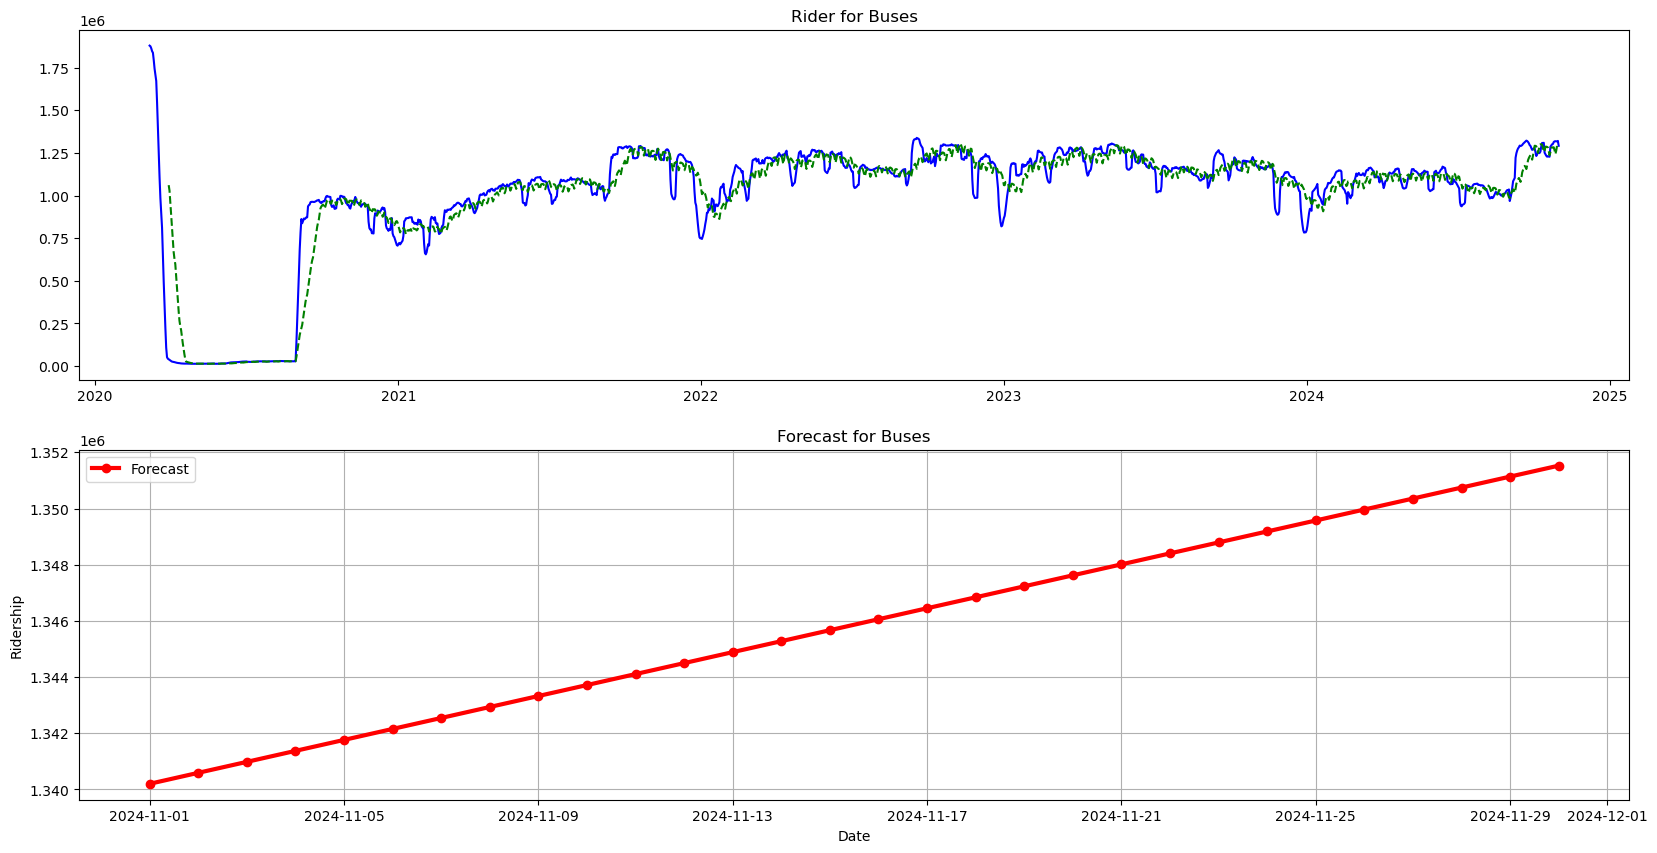

Mode Buses 

Next_30_Days_Total 40375953 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 1351528} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 1340202} 

Trend UPWARD 📈 


========== FORECAST FOR LIRR ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


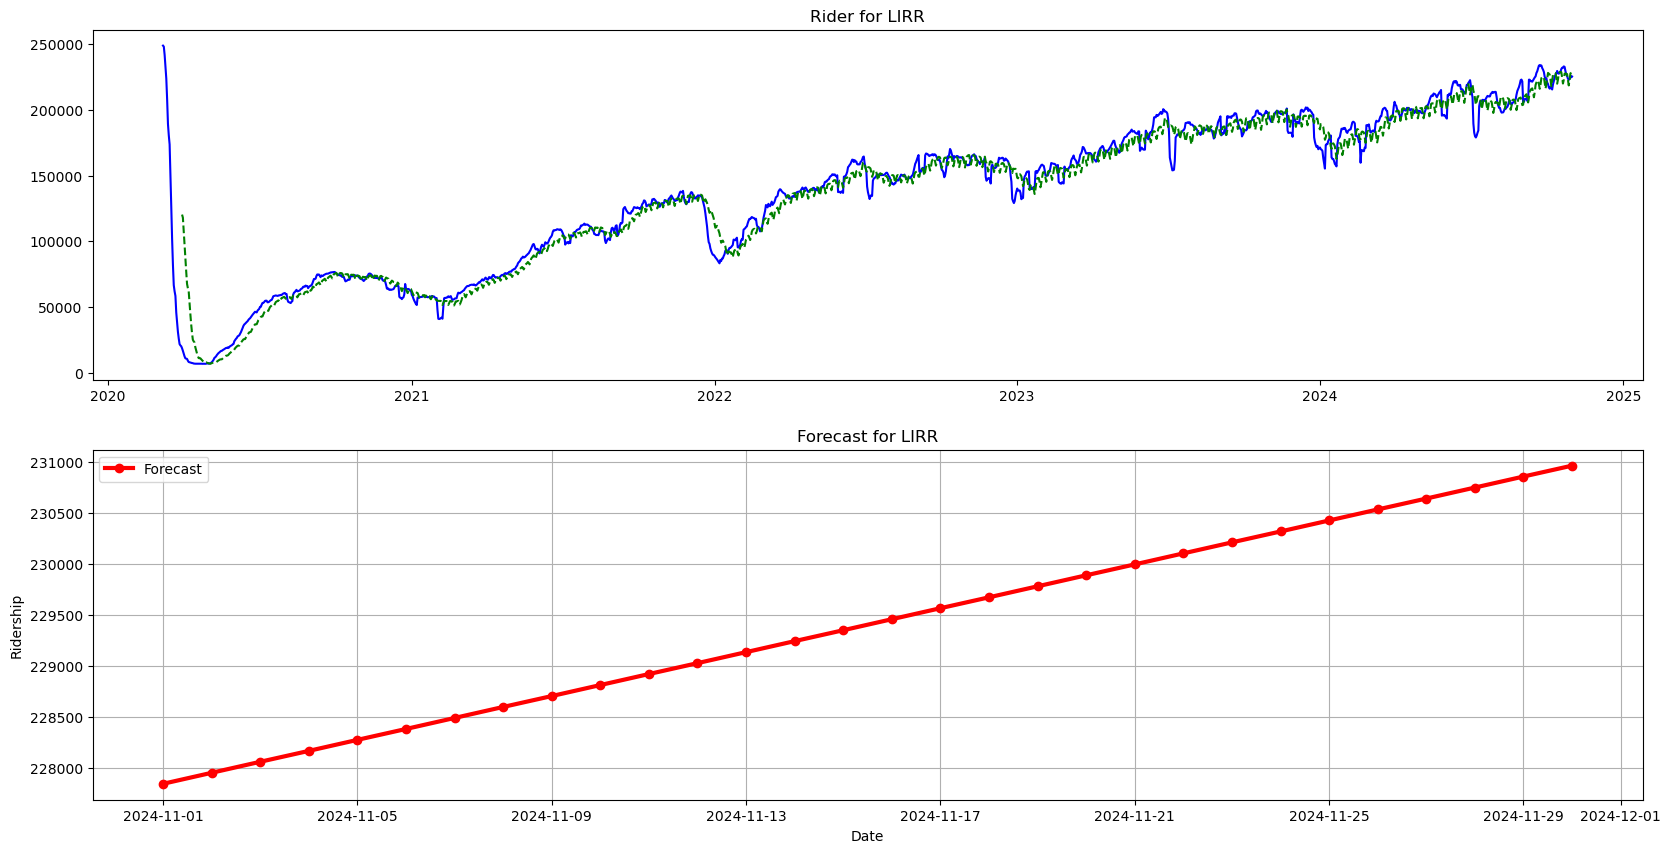

Mode LIRR 

Next_30_Days_Total 6882096 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 230964} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 227842} 

Trend UPWARD 📈 


========== FORECAST FOR MetroNorth ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


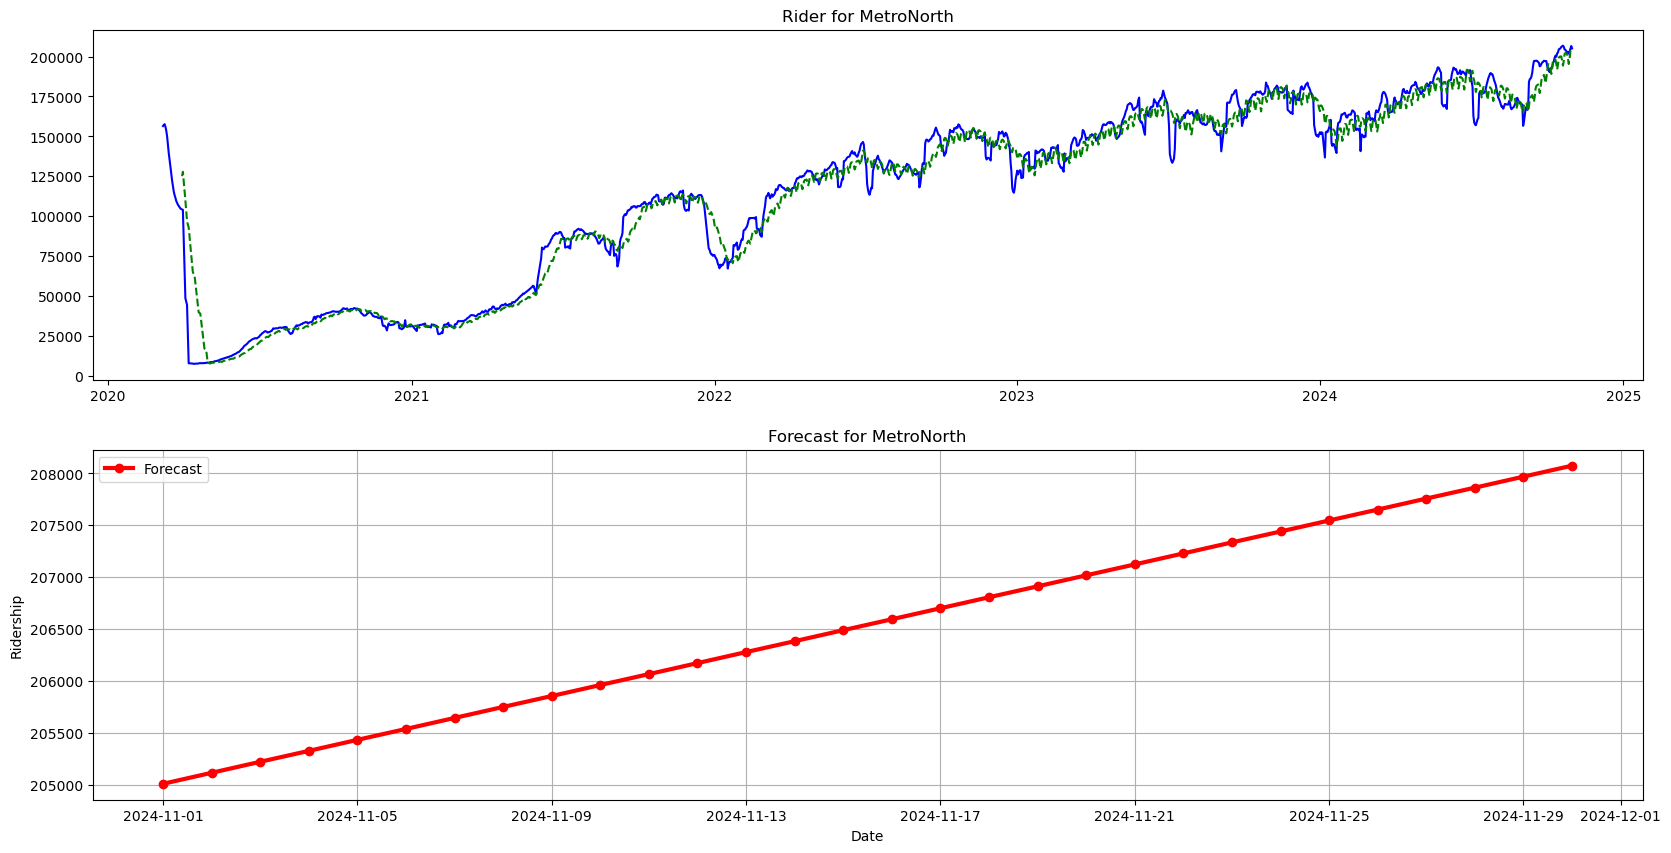

Mode MetroNorth 

Next_30_Days_Total 6196307 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 208075} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 205012} 

Trend UPWARD 📈 


========== FORECAST FOR AccessARide ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


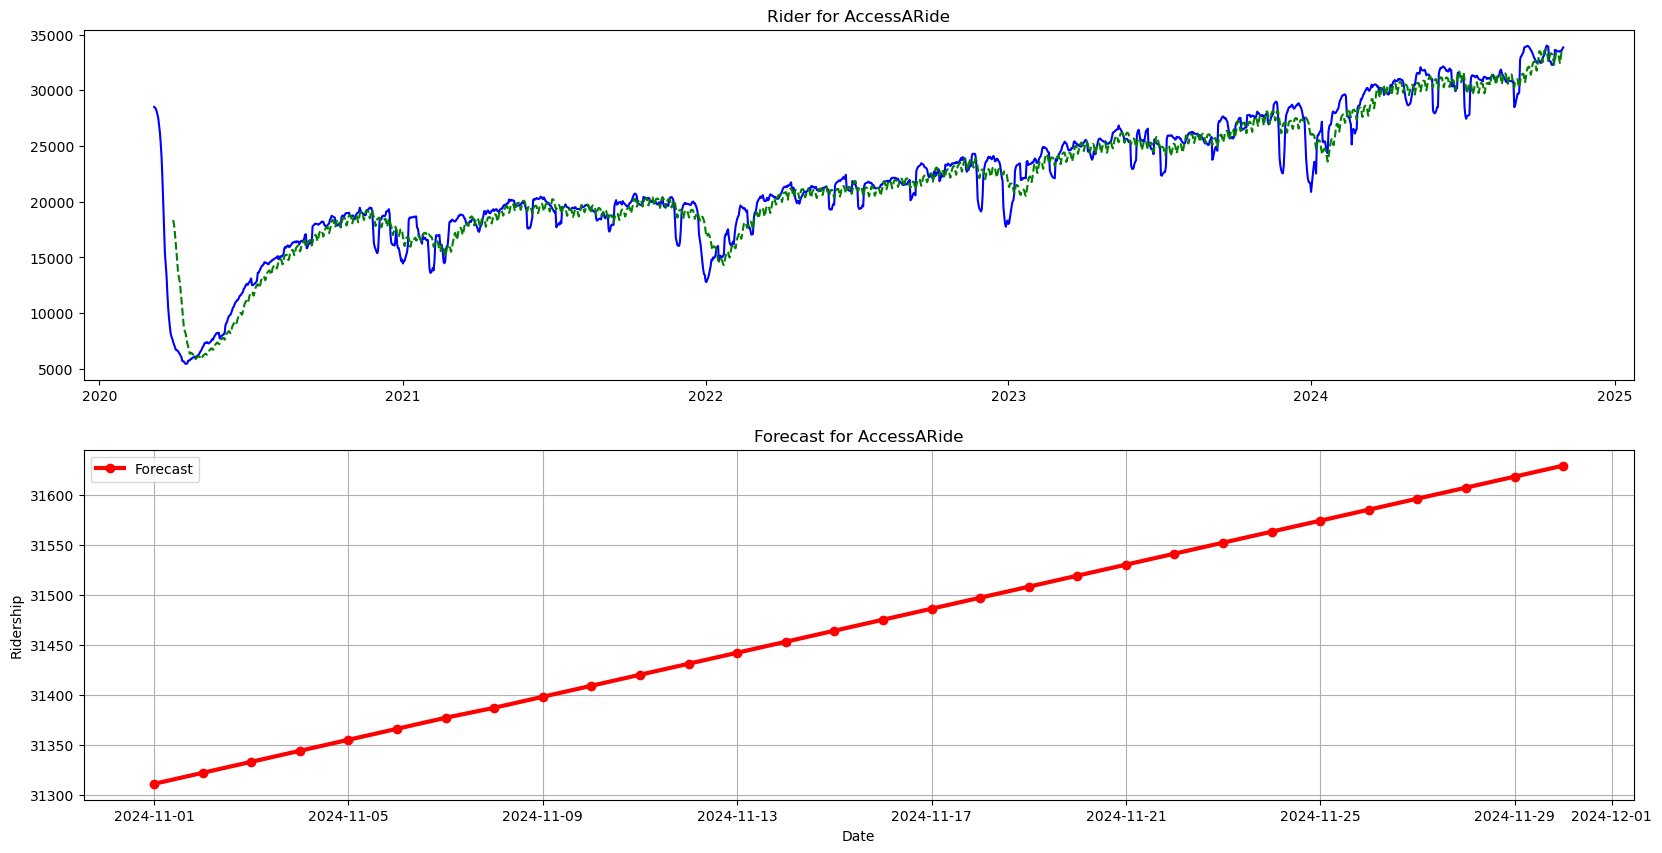

Mode AccessARide 

Next_30_Days_Total 944092 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 31629} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 31311} 

Trend UPWARD 📈 


========== FORECAST FOR StatenIsland ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


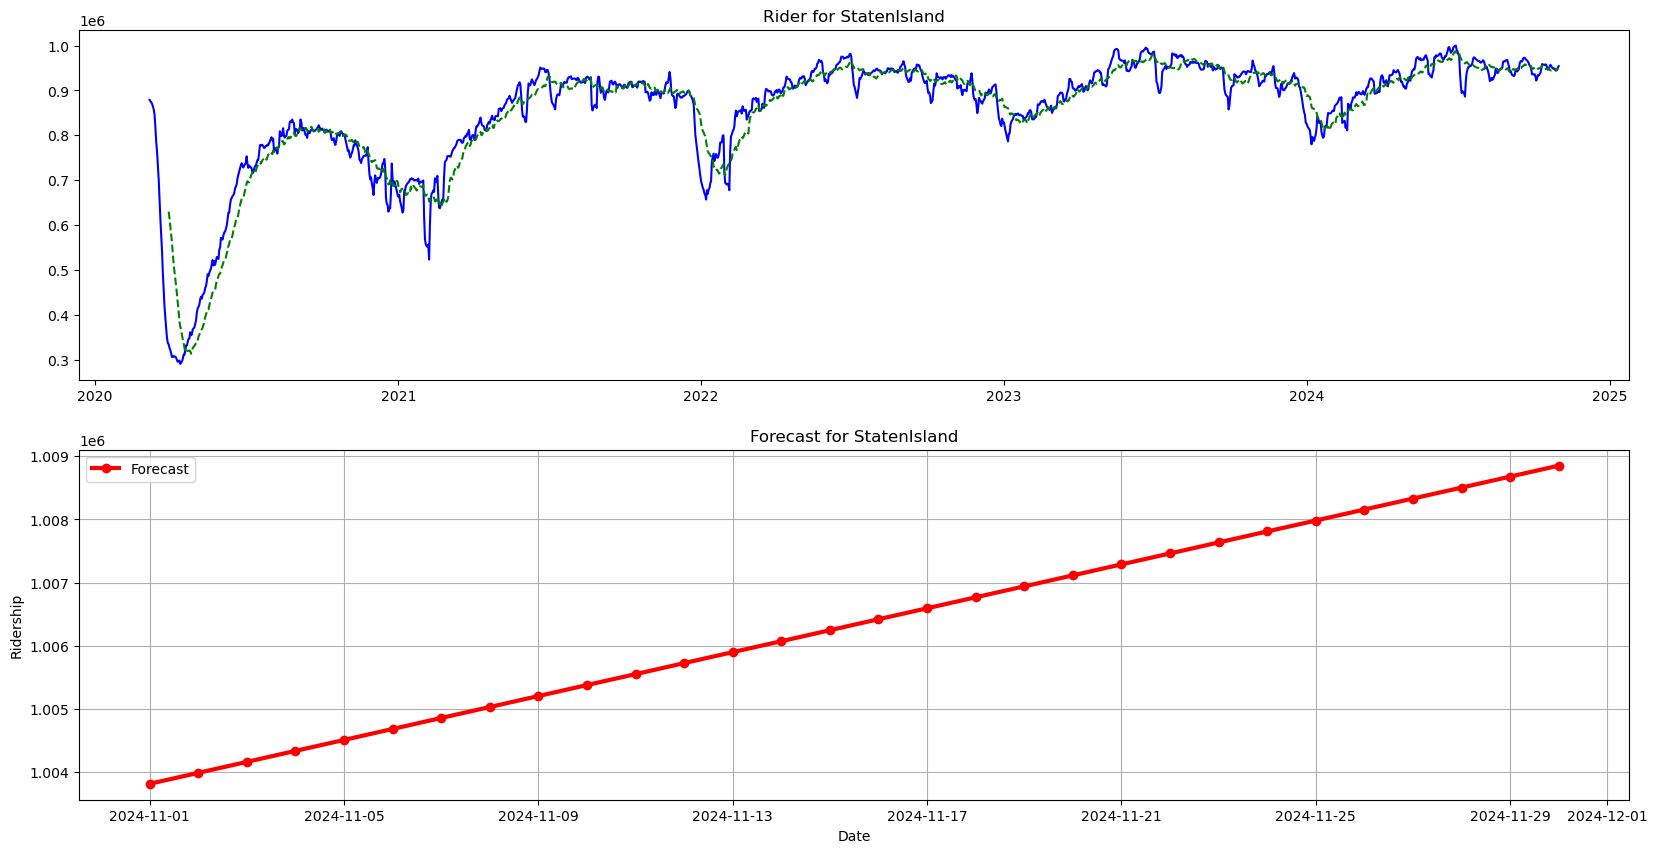

Mode StatenIsland 

Next_30_Days_Total 30190011 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 1008852} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 1003816} 

Trend UPWARD 📈 


========== FORECAST FOR Bridges_Tunnels ==========


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


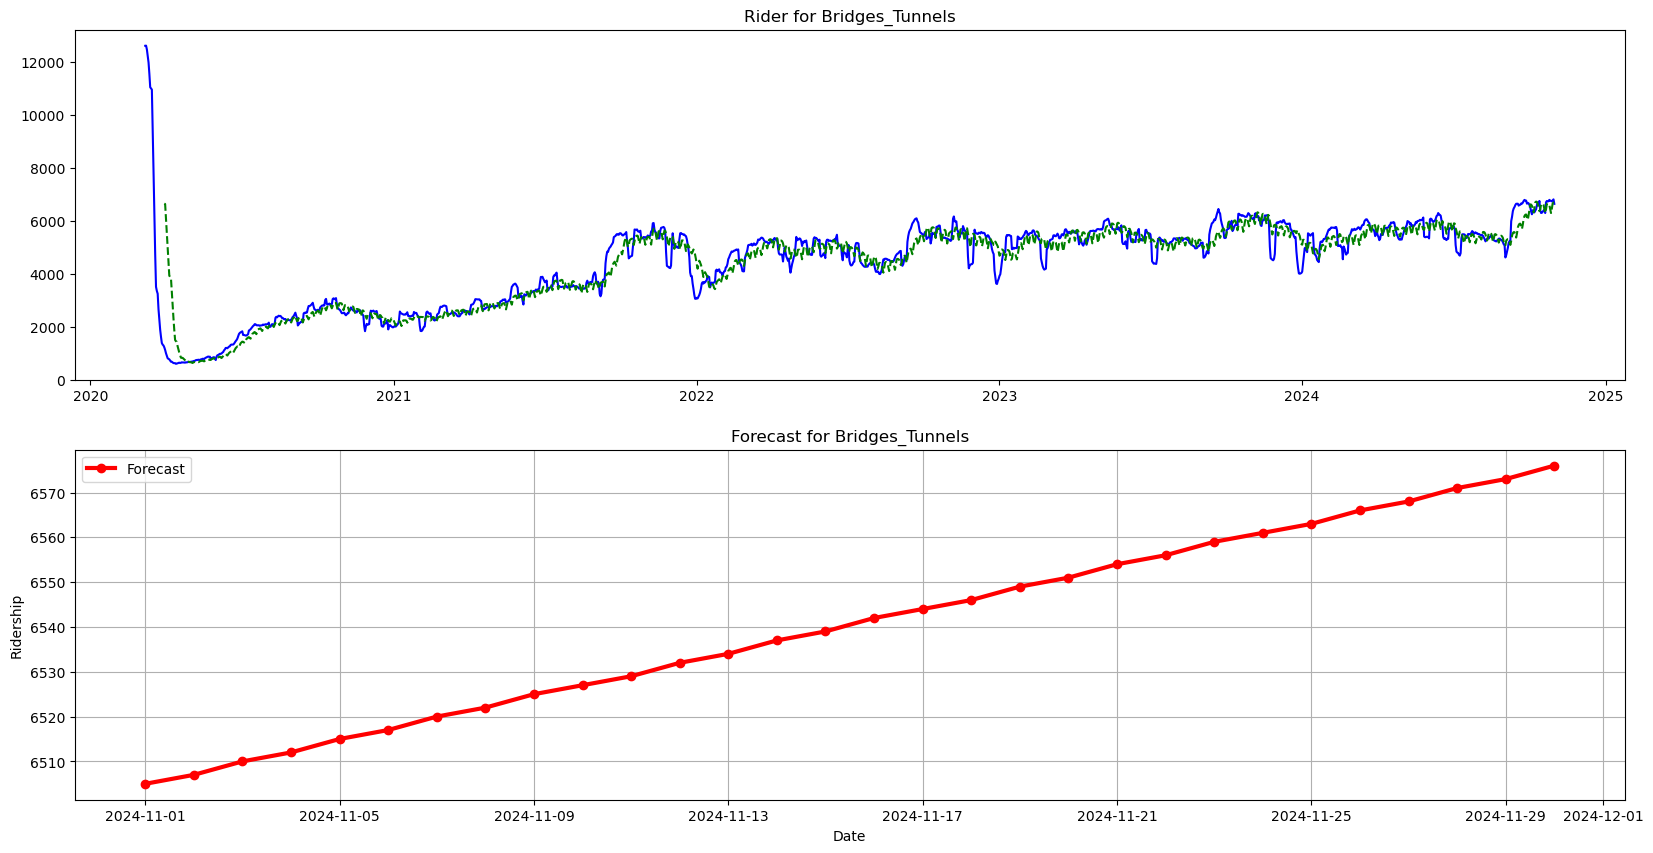

Mode Bridges_Tunnels 

Next_30_Days_Total 196210 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 6576} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 6505} 

Trend UPWARD 📈 



=== ALL FORECAST INSIGHTS ===
__________________________________________________
Mode Subways 

Next_30_Days_Total 113601495 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 3808060} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 3765373} 

Trend UPWARD 📈 

__________________________________________________
Mode Buses 

Next_30_Days_Total 40375953 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 1351528} 

Min_Day {'Date': Timestamp('2024-11-01 00:00:00'), 'Forecast_Ridership': 1340202} 

Trend UPWARD 📈 

__________________________________________________
Mode LIRR 

Next_30_Days_Total 6882096 

Max_Day {'Date': Timestamp('2024-11-30 00:00:00'), 'Forecast_Ridership': 230964} 

Mi

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# =========================
#   1) LOAD DATA
# =========================
df = pd.read_csv("Fact Ridership long.csv")
df['Date'] = pd.to_datetime(df['Date'])

# list of all modes
modes = df['Mode'].unique().tolist()

print("Available Modes:", modes)

# =========================
#   2) FORECAST FUNCTION
# =========================

def forecast_mode(df_mode, days=30):
    df_mode = df_mode.sort_values("Date").copy()

    # create time index
    df_mode['t'] = np.arange(len(df_mode))

    # train model
    X = df_mode[['t']]
    y = df_mode['Ridership']

    model = LinearRegression()
    model.fit(X, y)

    # forecast
    last_t = df_mode['t'].max()
    future_t = np.arange(last_t + 1, last_t + days + 1)
    forecast_values = model.predict(future_t.reshape(-1, 1))
    forecast_values = forecast_values.astype(int)


    # generate forecast dataframe
    forecast_df = pd.DataFrame({
        'Date': pd.date_range(df_mode['Date'].max() + pd.Timedelta(days=1), periods=days),
        'Forecast_Ridership': forecast_values
    })

    # moving average
    df_mode['MA_7'] = df_mode['Ridership'].rolling(window=7).mean()
    df_mode['MA_30'] = df_mode['Ridership'].rolling(30).mean()

    # plotting
    plt.figure(figsize=(20,10))
    plt.subplot(2, 1, 1)
    plt.plot(df_mode['Date'], df_mode['MA_7'], label="Actual", color='blue')
    plt.plot(df_mode['Date'], df_mode['MA_30'], label="30-day MA", color='green', linestyle='--')
    plt.title(f"Rider for {df_mode['Mode'].iloc[0]}")
    plt.subplot(2, 1, 2)
    plt.plot(forecast_df['Date'], forecast_df['Forecast_Ridership'], 
             label="Forecast", color='red', linewidth=3, marker='o')

    plt.title(f"Forecast for {df_mode['Mode'].iloc[0]}")
    plt.xlabel("Date")
    plt.ylabel("Ridership")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Insights
    insights = {
        "Mode": df_mode['Mode'].iloc[0],
        "Next_30_Days_Total": int(forecast_df['Forecast_Ridership'].sum()),
        "Max_Day": forecast_df.loc[forecast_df['Forecast_Ridership'].idxmax()].to_dict(),
        "Min_Day": forecast_df.loc[forecast_df['Forecast_Ridership'].idxmin()].to_dict(),
        "Trend": "UPWARD 📈" if model.coef_[0] > 0 else "DOWNWARD 📉"
    }
    
    return insights

# =========================
#   3) RUN FORECAST FOR ALL MODES
# =========================

all_insights = {}

for m in modes:
    mode_df = df[df['Mode'] == m]
    print(f"\n========== FORECAST FOR {m} ==========")
    insights = forecast_mode(mode_df, days=30)
    all_insights[m] = insights
    for z,y in insights.items():
        print(z,y,'\n')

# =========================
#   FINAL OUTPUT
# =========================

print("\n\n=== ALL FORECAST INSIGHTS ===")
for m, data in all_insights.items():
    print("__________________________________________________")
    for a,b  in data.items():
        print(a,b,"\n")